Esta notebook contiene bloques de código útiles para realizar Q-learning en el entorno "Taxi"

In [28]:
import numpy as np
import random
from taxi_env_extended import TaxiEnvExtended

In [29]:
env = TaxiEnvExtended()

Obtener la cantidad de estados y acciones

In [30]:
actions = env.action_space.n
states = env.observation_space.n

Inicialización de la tabla Q

In [31]:
Q = np.zeros((states, actions))
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Obtención de la acción a partir de la tabla Q

In [32]:
def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action

Epsilon-Greedy Policy

In [33]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()\
    
    else: # exploit
        action = np.argmax(Q[state])\
        
    return action

Ejemplo de episodio 

In [34]:
obs,_ = env.reset()
print(obs)
done = False
total_reward = 0
step_count = 0
while not done:
    state = obs
    action = epsilon_greedy_policy(state, Q, 0.5)
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    step_count += 1
    print('->', state, action, reward, obs, done)
    env.render()
print('total_reward', total_reward)
print('total_steps', step_count)

472
-> 472 0 -1 472 False
-> 472 0 -1 472 False
-> 472 0 -1 472 False
-> 472 0 -1 472 False
-> 472 3 -1 472 False
-> 472 0 -1 472 False
-> 472 5 -10 472 False
-> 472 0 -1 472 False
-> 472 0 -1 472 False
-> 472 5 -10 472 False
-> 472 0 -1 472 False
-> 472 3 -1 472 False
-> 472 4 -1 476 False
-> 476 4 -10 476 False
-> 476 0 -1 476 False
-> 476 0 -1 476 False
-> 476 0 -1 476 False
-> 476 3 -1 476 False
-> 476 0 -1 476 False
-> 476 4 -10 476 False
-> 476 0 -1 476 False
-> 476 0 -1 476 False
-> 476 1 -1 376 False
-> 376 4 -10 376 False
-> 376 1 -1 276 False
-> 276 1 -1 176 False
-> 176 5 -10 176 False
-> 176 3 -1 156 False
-> 156 0 -1 256 False
-> 256 0 -1 356 False
-> 356 0 -1 456 False
-> 456 0 -1 456 False
-> 456 0 -1 456 False
-> 456 1 -1 356 False
-> 356 0 -1 456 False
-> 456 2 -1 456 False
-> 456 0 -1 456 False
-> 456 5 -10 456 False
-> 456 0 -1 456 False
-> 456 0 -1 456 False
-> 456 1 -1 356 False
-> 356 0 -1 456 False
-> 456 0 -1 456 False
-> 456 0 -1 456 False
-> 456 0 -1 456 False

Generar muchos episodios

In [35]:
max_steps = env.max_steps
max_steps

200

In [36]:
episodes = 80000

In [37]:
alpha=1 / (max_steps+1)
alpha

0.004975124378109453

In [38]:
gamma = 0.9

In [39]:
epsilon =0.99

In [40]:
rewards=[]
steps=[]

In [41]:
from tqdm import tqdm

In [42]:
i = 0
success = 0
for i in tqdm(range(episodes)):
    
    total_reward = 0    
    step_count = 0
    obs, _ = env.reset()
    done=False
    while not done:
        state = obs
        action = epsilon_greedy_policy(state, Q, 0.1)
        obs, reward, done, _, _ = env.step(action)
        
        total_reward += reward
        step_count += 1
        if (reward ==20):
            success+=1
                      
        value = Q[state][action] + alpha*(reward + gamma*np.max(Q[obs]) - Q[state][action])
        Q[state][action] = value
    
    rewards.append(total_reward)
    steps.append(step_count)
    i=i+1
    if (i % 100 == 0) and (epsilon > 0.01):  
        epsilon *= 0.999
print(success)


100%|██████████| 80000/80000 [00:51<00:00, 1565.00it/s]

76902


In [43]:
print(success/episodes*100, '%')

96.1275 %


In [44]:
import matplotlib.pyplot as plt


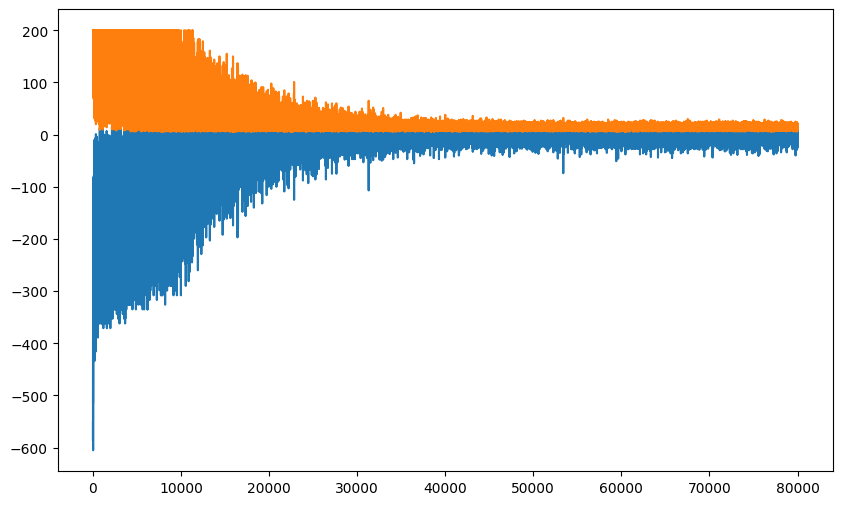

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.plot(steps)

plt.show()

In [46]:
Q

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.09957809e+00, -1.71148894e+00, -2.80237415e+00,
        -1.74359032e+00,  1.62261467e+00, -5.68296796e+00],
       [ 5.75508261e-01,  1.74155225e+00, -3.61544421e-01,
         1.54047472e+00,  7.71470000e+00, -2.52582521e+00],
       ...,
       [-7.83422644e-01,  2.65217313e+00, -7.72602659e-01,
        -7.13765881e-01, -1.06130025e+00, -9.17792162e-01],
       [-2.13917923e+00, -2.13576574e+00, -2.13366672e+00,
         7.80904313e-03, -2.42696002e+00, -2.48296793e+00],
       [ 1.87783696e-01,  1.28554772e-01,  1.90520107e-01,
         1.43616289e+01, -1.70072919e-01, -6.39596274e-02]])

In [47]:
policy=[]
for i in tqdm(range(states)):
    policy.append(max(Q[i]))

print(policy)


100%|██████████| 500/500 [00:00<00:00, 6831114.01it/s]

[0.0, 1.622614668676079, 7.714699999897478, 2.9140162994735466, -5.4673861524782, 0.0, -5.5158445486323755, -4.474810138944957, -1.156780957912759, -3.631982406786238, 0.0, -3.3394569080554435, -4.9359554465899755, -4.082896878056765, -4.939894003883753, 0.0, 19.999999999999645, 2.914016299877397, 9.68299999999279, 4.348906999953599, 0.0, -0.17395169163804539, 4.733922375749364, 0.9805986876862652, -5.153321377575912, 0.0, -5.220684690457006, -3.9048756104812035, -1.7314179163959724, -4.203457371819935, 0.0, -3.8575201589358756, -4.337335950084142, -3.409502958011319, -4.447786227805109, 0.0, 13.758580104125926, -0.2020381041998589, 2.645866221939932, 0.5168265760700331, 0.0, -4.800271243483433, -2.667307469958353, -4.412278533317931, -2.0558679683012797, 0.0, -2.145876515824063, 0.24250753822191307, -2.771602994555294, -4.978209419616245, 0.0, -4.5832483722608535, -3.764627849469333, -2.537810843151693, -3.78383247770479, 0.0, 0.6671786697930473, 0.29571506739776493, 0.643397687025374

In [48]:
rewards_testing=[]
steps_testing=[]

In [49]:
i = 0
while i< 10:
    print("episode:", i+1)
    obs,_ = env.reset()
    done = False
    total_reward = 0
    step_count = 0
    while not done:
        state = obs
        action = epsilon_greedy_policy(state, Q)
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        step_count += 1
        env.render()
    i+=1
    rewards_testing.append(total_reward)
    steps_testing.append(step_count)
    print('-> total reward: ', total_reward)
    print('-> total steps: ', step_count)

episode: 1
-> total reward:  4
-> total steps:  17
episode: 2
-> total reward:  12
-> total steps:  9
episode: 3
-> total reward:  -1
-> total steps:  13
episode: 4
-> total reward:  4
-> total steps:  17
episode: 5
-> total reward:  9
-> total steps:  12
episode: 6
-> total reward:  2
-> total steps:  10
episode: 7
-> total reward:  5
-> total steps:  16
episode: 8
-> total reward:  2
-> total steps:  19
episode: 9
-> total reward:  11
-> total steps:  10
episode: 10
-> total reward:  -2
-> total steps:  14


In [50]:
steps_testing

[17, 9, 13, 17, 12, 10, 16, 19, 10, 14]

In [51]:
rewards_testing

[4, 12, -1, 4, 9, 2, 5, 2, 11, -2]

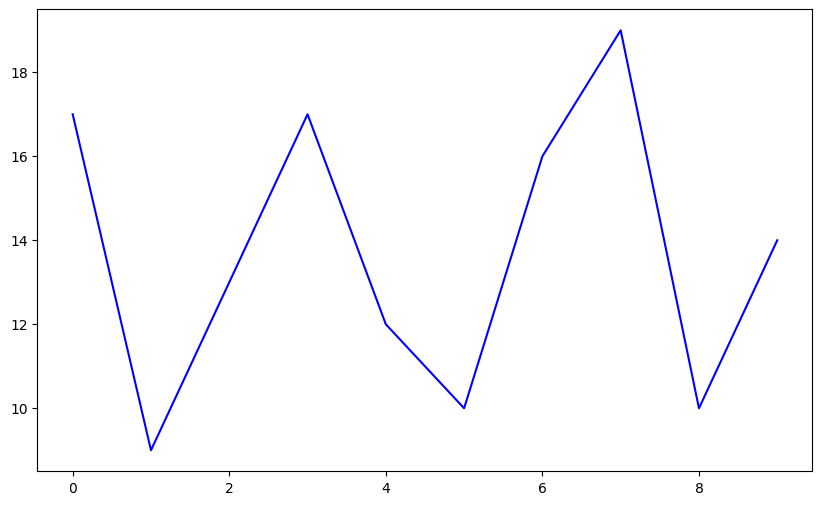

In [52]:
# Plot steps
plt.figure(figsize=(10, 6))
plt.plot(steps_testing, color='blue', label='Episode steps')

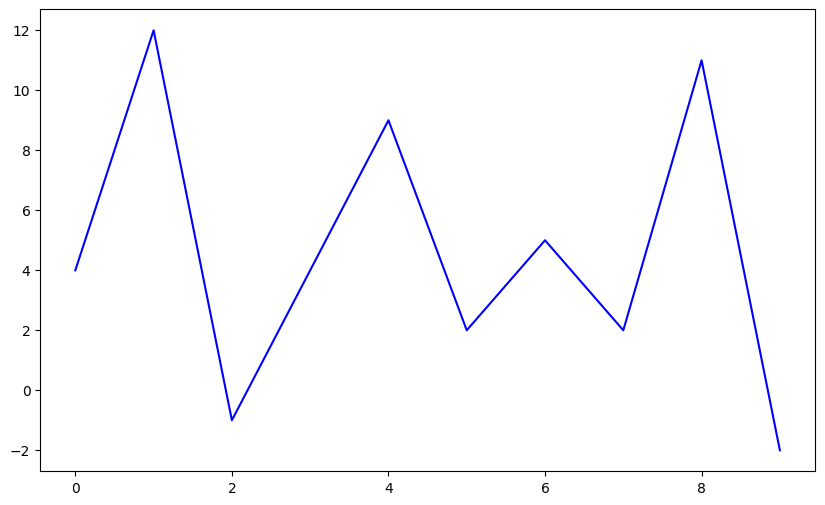

In [53]:
# Plot rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards_testing, color='blue', label='Episode steps')

In [54]:
average_steps = np.mean(steps_testing)
print("average steps: ", average_steps)
average_rewards = np.mean(rewards_testing)
print("Average rewards: ", average_rewards)

average steps:  13.7
Average rewards:  4.6
